Disciplina - Tópicos em Sistemas de Apoio a Descisão<br>
Profº. Rodrigo Bortoletto<br>
Discente: Claudio Santos Cabral - Prontuário: GU3055795

# Dataset: Índices de preços de habitação (HPIs) da FHFA.
# Contextualização: Crise de 2008 Subprime, aquisição de imóveis que ilustra os valores do índice NSA e SA em meados na década de 1970.

Coluna | Descrição<br>
hpi_type  -  tipo_hpi (tipo de índice de preços de habitação)<br>
hpi_flavor - tipo_variacao_hpi (variação ou sabor do índice HPI, como compra, refinanciamento, etc.)<br>
frequency -  frequência (mensal, trimestral, anual, etc.)<br>
level -        nível (nível geográfico: nacional, estadual, municipal, etc.)<br>
place_name -   nome_local (nome do local, como cidade ou estado)<br>
place_id -     id_local (identificador do local)<br>
yr -           ano<br>
period -       período (geralmente trimestre ou mês)<br>
index_nsa -    indice_nsa (índice não ajustado sazonalmente)<br>
index_sa - indice_sa (índice ajustado sazonalmente)<br>

In [2]:
# Carregamento das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
import matplotlib.pyplot as plt
import scipy

In [3]:
# Carremento da Base de Dados
dados = pd.read_csv('hpi_master.csv')

In [4]:
dados.dataframeName = 'hpi_master.csv'
nRow, nCol = dados.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 128362 rows and 10 columns


In [5]:
dados.head(100)

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
0,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,1,100.00,100.00
1,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,2,100.87,100.86
2,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,3,101.32,100.90
3,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,4,101.73,100.97
4,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1991,5,102.32,101.30
...,...,...,...,...,...,...,...,...,...,...
95,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1998,12,141.28,141.08
96,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1999,1,141.24,141.58
97,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1999,2,142.45,142.43
98,traditional,purchase-only,monthly,USA or Census Division,East North Central Division,DV_ENC,1999,3,143.35,142.80


In [6]:
dados.shape

(128362, 10)

In [7]:
dados.tail()

,hpi_type,hpi_flavor,frequency,level,place_name,place_id,yr,period,index_nsa,index_sa
128357,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2023,4,194.70,197.81
128358,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,1,208.69,214.00
128359,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,2,230.83,224.55
128360,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,3,241.01,240.42
128361,developmental,purchase-only,quarterly,Puerto Rico,Puerto Rico,PR,2024,4,247.63,251.42


In [8]:
dados.isnull().sum()

hpi_type          0
hpi_flavor        0
frequency         0
level             0
place_name        0
place_id          0
yr                0
period            0
index_nsa         1
index_sa      85522
dtype: int64

<Axes: >

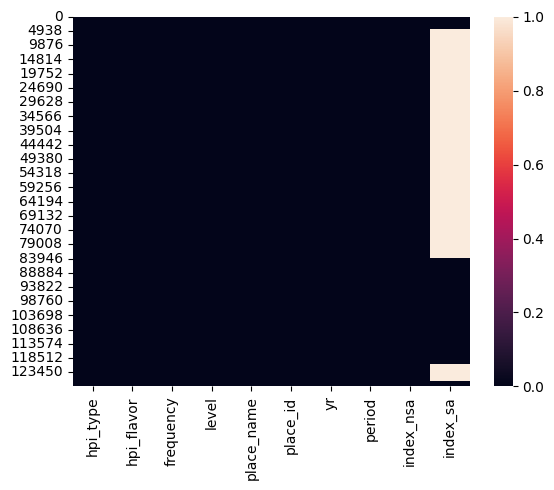

In [9]:
sns.heatmap(dados.isnull())

In [10]:
dados.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
128357    False
128358    False
128359    False
128360    False
128361    False
Length: 128362, dtype: bool

In [11]:
dados['hpi_type'].unique()

array(['traditional', 'non-metro', 'manufactured', 'distress-free',
       'developmental'], dtype=object)

In [12]:
dados['level'].unique()

array(['USA or Census Division', 'MSA', 'State', 'Puerto Rico'],
      dtype=object)

In [13]:
dados = dados.dropna(subset=['index_nsa'])

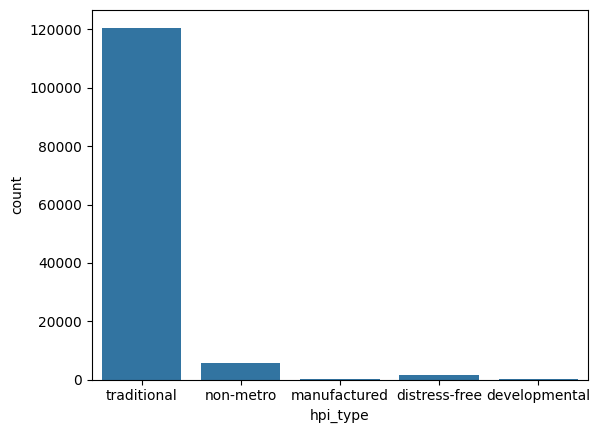

In [14]:
sns.countplot(data=dados, x='hpi_type')
plt.show()

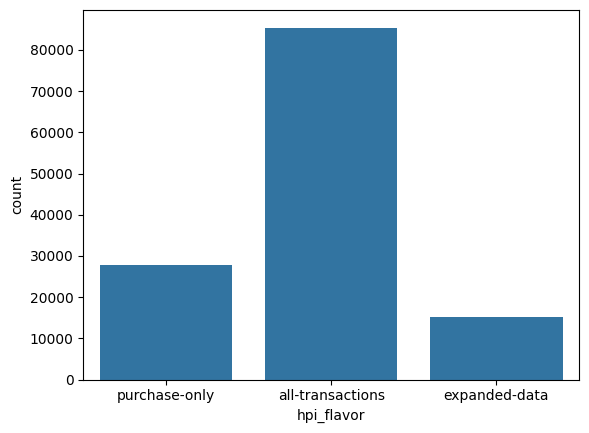

In [15]:
sns.countplot(data=dados, x='hpi_flavor')
plt.show()

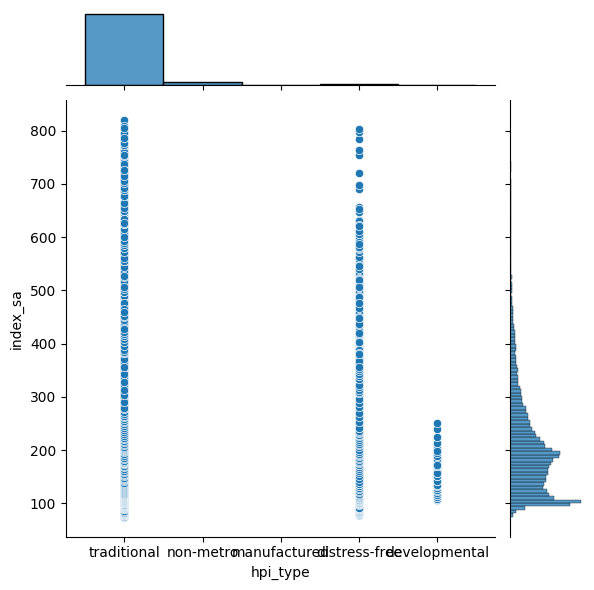

In [16]:
sns.jointplot(data=dados, x='hpi_type', y='index_sa', kind='scatter')
plt.show()

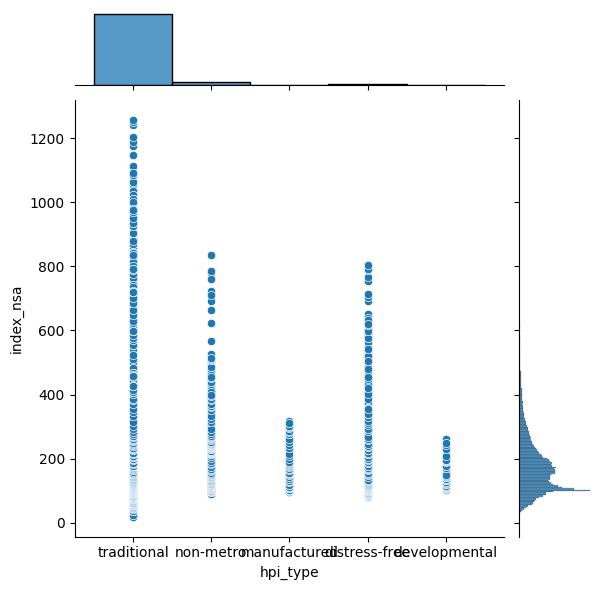

In [17]:
sns.jointplot(data=dados, x='hpi_type', y='index_nsa', kind='scatter')
plt.show()

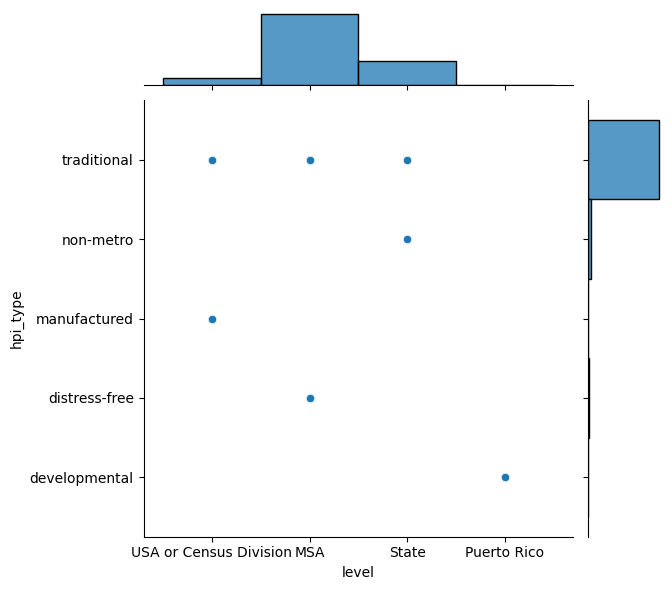

In [18]:
sns.jointplot(data=dados, x='level', y='hpi_type', kind='scatter')
plt.show()

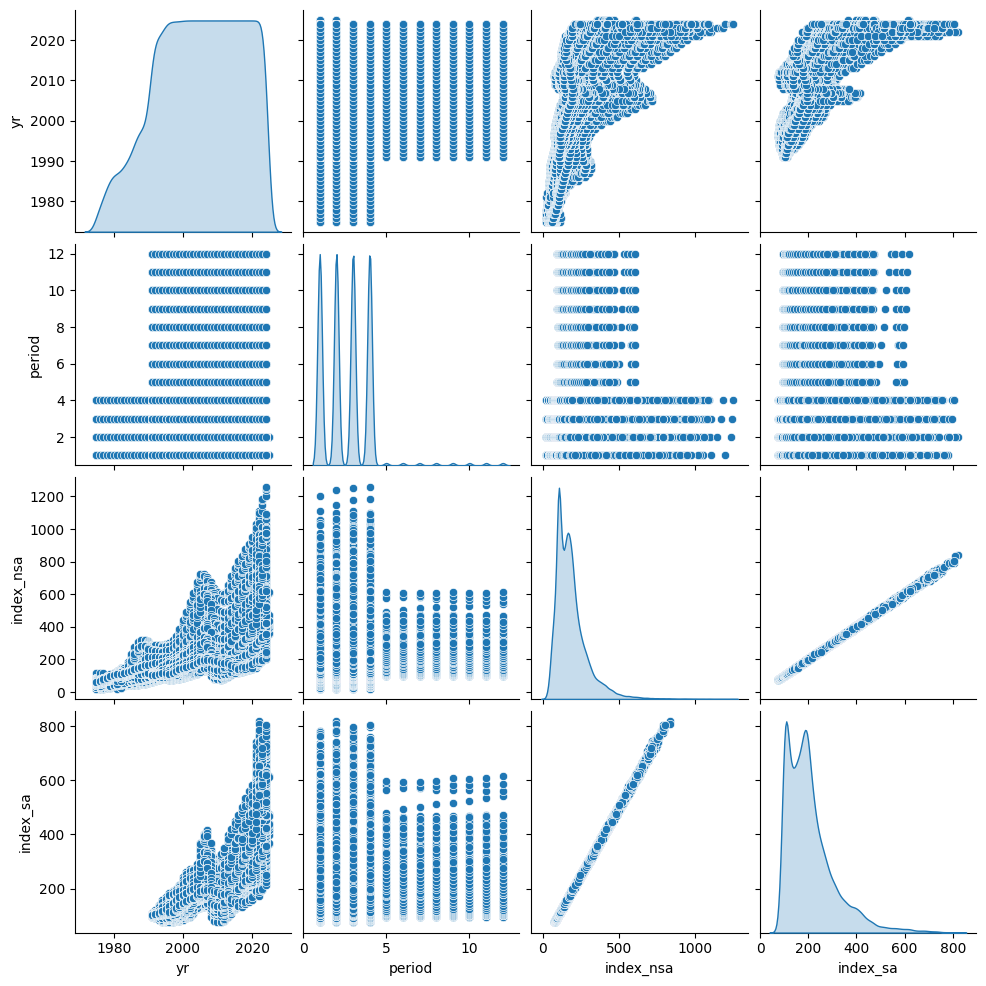

In [19]:
sns.pairplot(dados, diag_kind='kde')

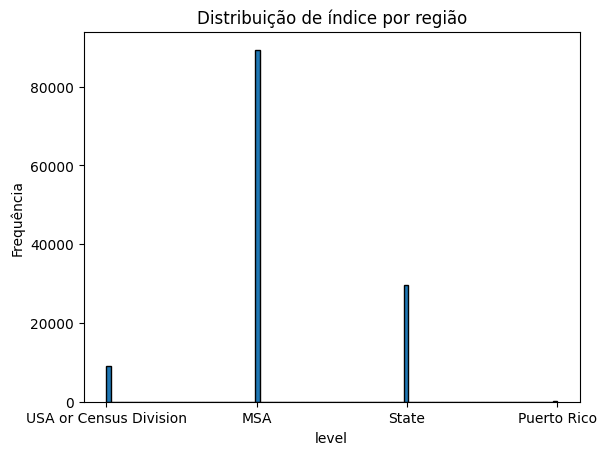

In [20]:
plt.hist(dados['level'], bins=100, edgecolor='black') 
plt.title('Distribuição de índice por região')
plt.xlabel('level')
plt.ylabel('Frequência') 
plt.show()

# Análise Exploratória EDA - Valores ausentes/faltantes:
Coluna - Utilidade<br>
[hpi_type] [Categórica] [tipo_hpi (tipo de índice de preços de habitação)].<br>
[hpi_flavor][Categórica] [tipo_variacao_hpi (variação ou sabor do índice HPI, como compra, refinanciamento, etc.)]<br>
[frequency] [Categórica] [frequência (mensal, trimestral, anual, etc.)]<br>
[level] [Categórica] [(nível geográfico: nacional, estadual, municipal, etc.)]<br>
[place_name] [Categórica] [nome_local (nome do local, como cidade ou estado.)]<br>
[place_id] [Categórica] [id_local (identificador do local.)].<br>
[yr] [Numérica] [ano]<br>
[period] [Numérica] [período (geralmente trimestre ou mês)]<br>
[index_nsa] [Numérica] [índice não ajustado sazonalmente]<br>
[index_sa][Numérica] [índice ajustado sazonalmente]<br>

skewness ≈ 0: Distribuição simétrica (média ≈ mediana).<br>
skewness > 0: Cauda à direita (valores extremos altos), prefira a mediana.<br>
skewness < 0: Cauda à esquerda (valores extremos baixos), prefira a mediana.<br>

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns

dados_index_sa = dados["index_sa"]

mean_index_sa = dados_index_sa.mean()
median_index_sa = dados_index_sa.median()
std = dados_index_sa.std()

skewness = (3 * (mean_index_sa - median_index_sa)) / std

print(f" Cálculo Assimetria - {skewness:.5f}")


 Cálculo Assimetria - 0.62965


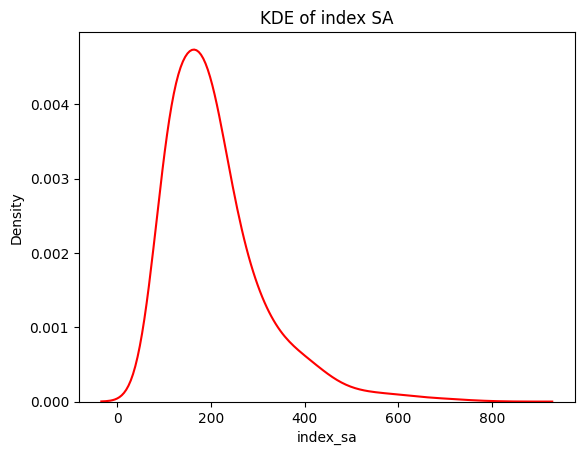

In [22]:
sns.kdeplot(dados["index_sa"], bw_adjust=3, color="red")
plt.title("KDE of index SA");

# Assimetria e Curtose Alta

Text(0.5, 1.0, 'A histogram of the carat of index SA')

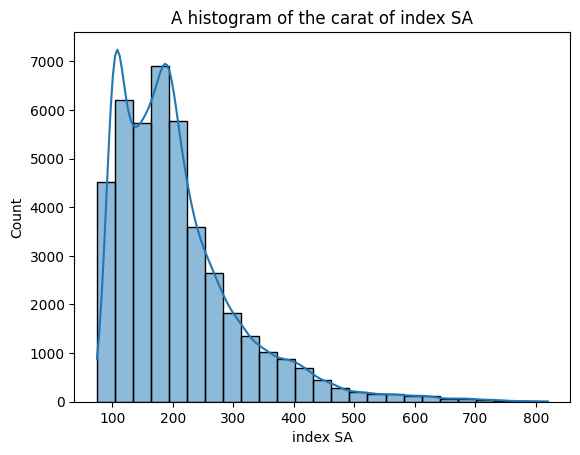

In [23]:
sns.histplot(dados["index_sa"], bins=25, kde=True)
plt.xlabel("index SA")
plt.title("A histogram of the carat of index SA")

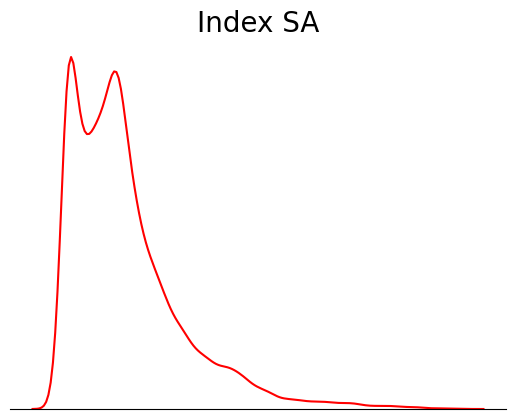

In [24]:
sns.kdeplot(dados_index_sa, color="red")
sns.despine(top=True, right=True, left=True)

plt.xticks([])
plt.yticks([])
plt.ylabel("")
plt.xlabel("")
plt.title("Index SA", fontdict=dict(fontsize=20));

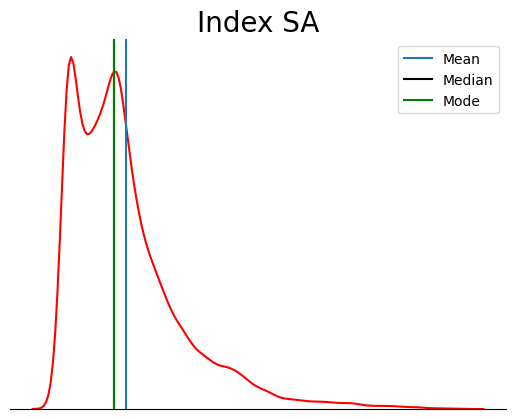

In [25]:
sns.kdeplot(dados_index_sa, color="red")

sns.despine(top=True, right=True, left=True)
plt.xticks([])
plt.yticks([])
plt.ylabel("")
plt.xlabel("")
plt.title("Index SA", fontdict=dict(fontsize=20))

mean_index_sa = dados["index_sa"].mean()
median_index_sa = dados["index_sa"].median()
mode_index_sa = dados["index_sa"].mode().squeeze()

plt.axvline(mean_index_sa, label="Mean")
plt.axvline(median_index_sa, color="black", label="Median")
plt.axvline(median_index_sa, color="green", label="Mode")

plt.legend();


# Imputação dos dados faltantes do Index SA

In [26]:
valor_imputacao = dados['index_sa'].median()
dados['index_sa'].fillna(valor_imputacao, inplace=True)

<Axes: >

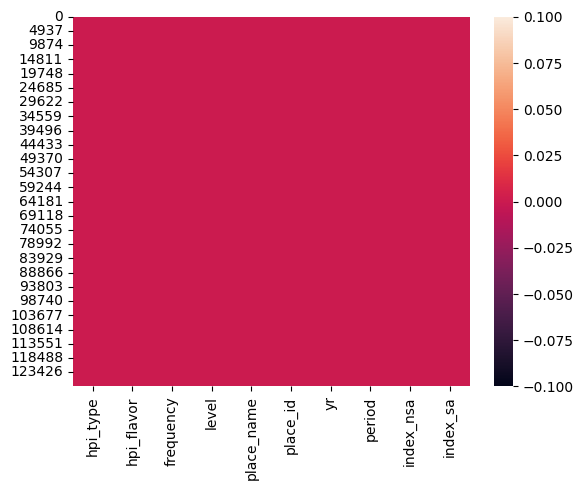

In [27]:
sns.heatmap(dados.isnull())

In [29]:
dados.isnull().sum()

hpi_type      0
hpi_flavor    0
frequency     0
level         0
place_name    0
place_id      0
yr            0
period        0
index_nsa     0
index_sa      0
dtype: int64

# Codificação de Rótulos One-Hot Encoding e LabelEncoding
Coluna	Tipo	Codificação Recomendada<br>
hpi_type	Categórica	✅ LabelEncoding<br>
hpi_flavor	Categórica	✅ One-Hot Encoding (se mantida)<br>
frequency	Categórica	⚠️ Só codificar se não for única<br>
level	Categórica	✅ One-Hot Encoding<br>
place_id	Categórica	❌ Removida / redundante<br>
place_name	Categórica ✅ LabelEncoding<br>
yr, period, index_nsa, index_sa	Numéricas	❌ Não precisa codificar<br>

In [30]:
dados.dtypes

hpi_type       object
hpi_flavor     object
frequency      object
level          object
place_name     object
place_id       object
yr              int64
period          int64
index_nsa     float64
index_sa      float64
dtype: object

In [31]:
dados['hpi_type'].value_counts()

hpi_type
traditional      120655
non-metro          5639
distress-free      1632
developmental       235
manufactured        200
Name: count, dtype: int64

In [32]:
dados['hpi_flavor'].value_counts()

hpi_flavor
all-transactions    85421
purchase-only       27844
expanded-data       15096
Name: count, dtype: int64

In [33]:
dados['level'].value_counts()

level
MSA                       89395
State                     29711
USA or Census Division     9020
Puerto Rico                 235
Name: count, dtype: int64

In [34]:
dados['frequency'].value_counts()

frequency
quarterly    124261
monthly        4100
Name: count, dtype: int64

In [35]:
dados['place_name'].value_counts()

place_name
United States                    1082
East North Central Division       882
New England Division              882
South Atlantic Division           882
East South Central Division       882
                                 ... 
Johnstown, PA                     120
Beckley, WV                       112
California-Lexington Park, MD     109
Hinesville, GA                    100
The Villages, FL                   97
Name: count, Length: 466, dtype: int64

traditional - Índice tradicional, baseado em transações de imóveis unifamiliares financiadas por hipotecas conformes (que atendem aos critérios da Fannie Mae e Freddie Mac). É o tipo mais comum e base de comparação para outros índices.

non-metro - Índice calculado apenas para áreas não metropolitanas, ou seja, regiões fora dos centros urbanos principais. Permite avaliar a valorização de imóveis em áreas rurais ou menos densas.

distress-free - Índice que exclui transações com problemas financeiros, como leilões ou execuções hipotecárias. Representa melhor o mercado tradicional, livre de distorções causadas por vendas forçadas.

developmental - Utilizado em regiões ou para períodos em que os dados são experimentais, em fase de desenvolvimento ou com baixa cobertura histórica. Pode ter menor precisão.

manufactured - Refere-se ao índice de preços de imóveis pré-fabricados (manufactured homes), que são diferentes de casas tradicionais em termos de construção e financiamento.

all-transactions - Inclui todas as transações de imóveis residenciais unifamiliares financiadas por hipotecas conformes: tanto compras quanto refinanciamentos. Isso oferece uma visão ampla do mercado, mas pode ser influenciado por mudanças nas taxas de juros ou padrões de refinanciamento. Ideal para análise de tendências de longo prazo.

purchase-only - Considera apenas compras de imóveis (exclui refinanciamentos). É um índice mais fiel às variações reais de preço de mercado, pois reflete apenas valores de compra e venda. Recomendado quando o foco é analisar o comportamento do mercado de compra de casas.

expanded-data - Inclui, além dos dados tradicionais, informações de hipotecas que não são conformes (como as de Fannie Mae e Freddie Mac), incorporando também financiamentos privados. É um índice mais abrangente, útil para capturar a realidade de mercados mais complexos ou sofisticados.

In [36]:
dados_encoded_data = pd.get_dummies(dados, columns = ['hpi_flavor', 'frequency', 'level'], drop_first=True)

In [37]:
dados_encoded_data.head()

,hpi_type,place_name,place_id,yr,period,index_nsa,index_sa,hpi_flavor_expanded-data,hpi_flavor_purchase-only,frequency_quarterly,level_Puerto Rico,level_State,level_USA or Census Division
0,traditional,East North Central Division,DV_ENC,1991,1,100.00,100.00,False,True,False,False,False,True
1,traditional,East North Central Division,DV_ENC,1991,2,100.87,100.86,False,True,False,False,False,True
2,traditional,East North Central Division,DV_ENC,1991,3,101.32,100.90,False,True,False,False,False,True
3,traditional,East North Central Division,DV_ENC,1991,4,101.73,100.97,False,True,False,False,False,True
4,traditional,East North Central Division,DV_ENC,1991,5,102.32,101.30,False,True,False,False,False,True


In [38]:
label_encoder = preprocessing.LabelEncoder()
dados_encoded_data['place_name'] = label_encoder.fit_transform(dados_encoded_data['place_name'])
print(dados_encoded_data)

             hpi_type  place_name place_id    yr  period  index_nsa  index_sa  \
0         traditional         115   DV_ENC  1991       1     100.00    100.00   
1         traditional         115   DV_ENC  1991       2     100.87    100.86   
2         traditional         115   DV_ENC  1991       3     101.32    100.90   
3         traditional         115   DV_ENC  1991       4     101.73    100.97   
4         traditional         115   DV_ENC  1991       5     102.32    101.30   
...               ...         ...      ...   ...     ...        ...       ...   
128357  developmental         342       PR  2023       4     194.70    197.81   
128358  developmental         342       PR  2024       1     208.69    214.00   
128359  developmental         342       PR  2024       2     230.83    224.55   
128360  developmental         342       PR  2024       3     241.01    240.42   
128361  developmental         342       PR  2024       4     247.63    251.42   

        hpi_flavor_expanded

In [39]:
label_encoder = preprocessing.LabelEncoder()
dados_encoded_data['hpi_type'] = label_encoder.fit_transform(dados_encoded_data['hpi_type'])
print(dados_encoded_data)

        hpi_type  place_name place_id    yr  period  index_nsa  index_sa  \
0              4         115   DV_ENC  1991       1     100.00    100.00   
1              4         115   DV_ENC  1991       2     100.87    100.86   
2              4         115   DV_ENC  1991       3     101.32    100.90   
3              4         115   DV_ENC  1991       4     101.73    100.97   
4              4         115   DV_ENC  1991       5     102.32    101.30   
...          ...         ...      ...   ...     ...        ...       ...   
128357         0         342       PR  2023       4     194.70    197.81   
128358         0         342       PR  2024       1     208.69    214.00   
128359         0         342       PR  2024       2     230.83    224.55   
128360         0         342       PR  2024       3     241.01    240.42   
128361         0         342       PR  2024       4     247.63    251.42   

        hpi_flavor_expanded-data  hpi_flavor_purchase-only  \
0                        

In [40]:
dados_encoded_data['hpi_type'].unique()

array([4, 3, 2, 1, 0])

In [41]:
dados_encoded = dados_encoded_data.drop(columns=['place_id'])
dados_encoded

,hpi_type,place_name,yr,period,index_nsa,index_sa,hpi_flavor_expanded-data,hpi_flavor_purchase-only,frequency_quarterly,level_Puerto Rico,level_State,level_USA or Census Division
0,4,115,1991,1,100.00,100.00,False,True,False,False,False,True
1,4,115,1991,2,100.87,100.86,False,True,False,False,False,True
2,4,115,1991,3,101.32,100.90,False,True,False,False,False,True
3,4,115,1991,4,101.73,100.97,False,True,False,False,False,True
4,4,115,1991,5,102.32,101.30,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
128357,0,342,2023,4,194.70,197.81,False,True,True,True,False,False
128358,0,342,2024,1,208.69,214.00,False,True,True,True,False,False
128359,0,342,2024,2,230.83,224.55,False,True,True,True,False,False
128360,0,342,2024,3,241.01,240.42,False,True,True,True,False,False


array([[<Axes: title={'center': 'hpi_type'}>,
        <Axes: title={'center': 'place_name'}>],
       [<Axes: title={'center': 'yr'}>,
        <Axes: title={'center': 'period'}>],
       [<Axes: title={'center': 'index_nsa'}>,
        <Axes: title={'center': 'index_sa'}>]], dtype=object)

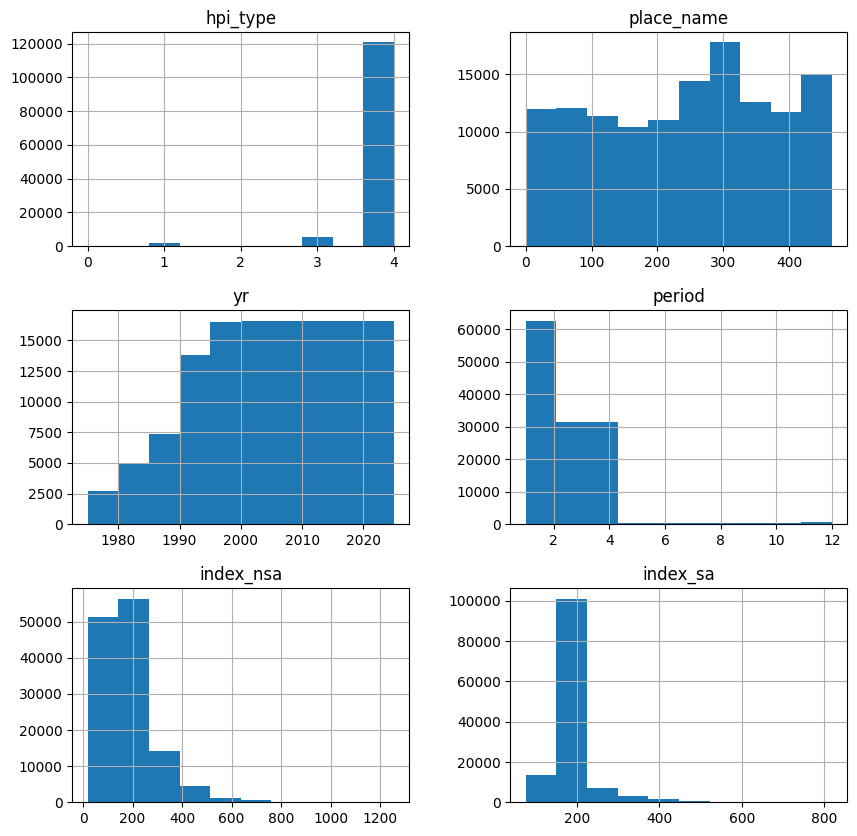

In [42]:
dados_encoded.hist(figsize=(10,10))

# Normalizar as variaveis numéricas - Identificando Outliers

<Axes: ylabel='index_nsa'>

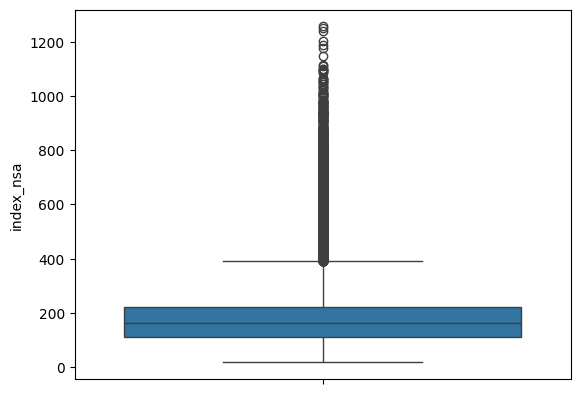

In [43]:
sns.boxplot(y='index_nsa', data=dados)

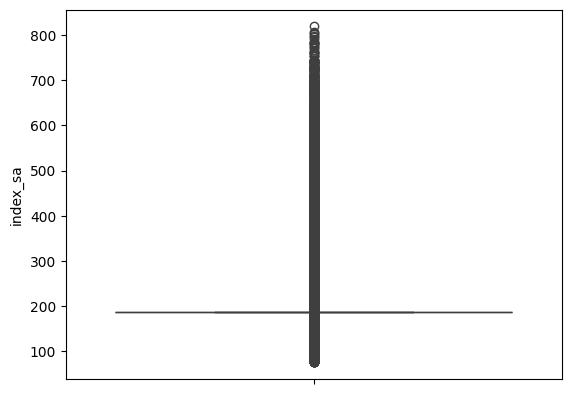

In [44]:
sns.boxplot(y='index_sa', data=dados)
plt.show()

<Axes: >

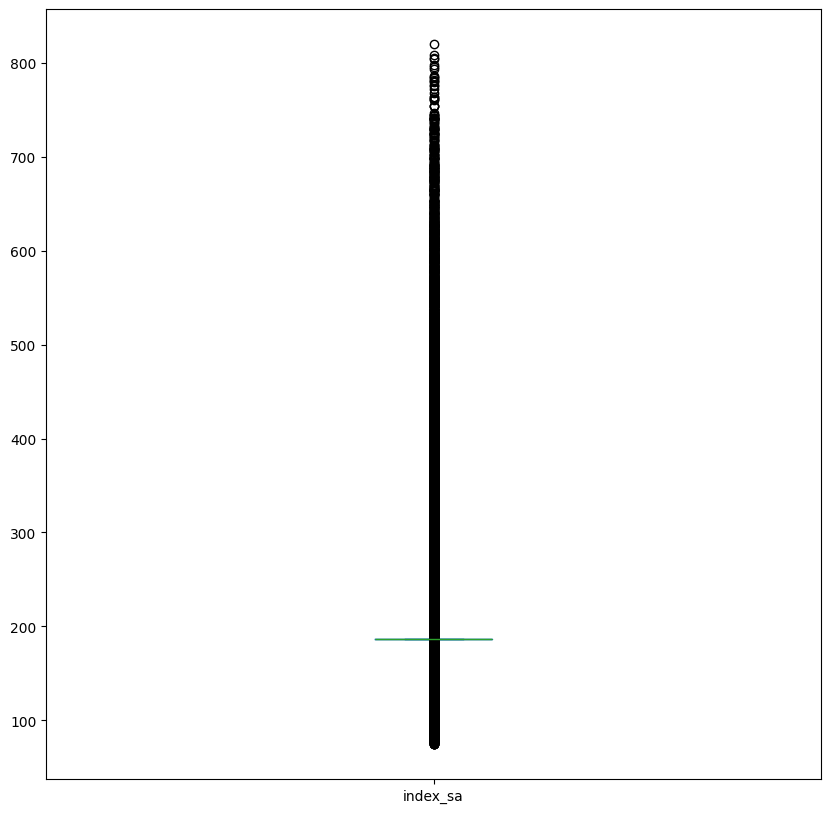

In [45]:
dados_encoded['index_sa'].plot(kind='box',figsize=(10,10))

In [46]:
q1 = dados_encoded['index_sa'].quantile(0.25)
q3 = dados_encoded['index_sa'].quantile(0.75)

iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

dados_enconded_clean = dados_encoded[(dados_encoded['index_sa'] >= limite_inferior) & (dados_encoded['index_sa'] <= limite_superior)]

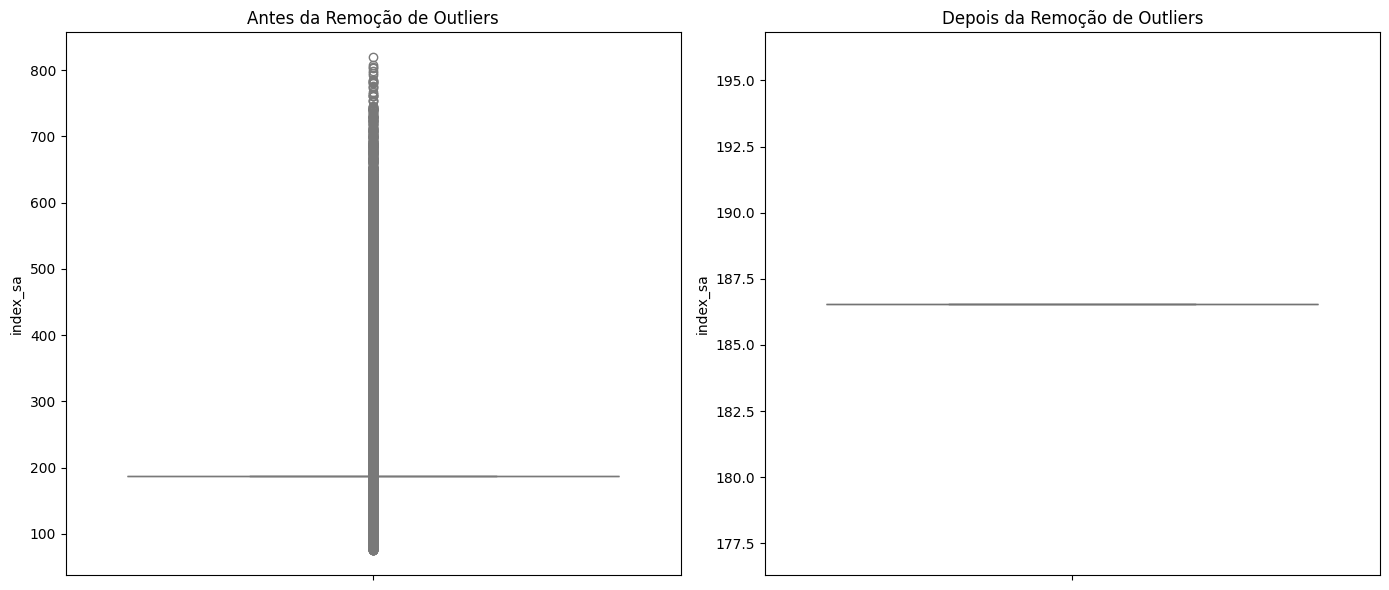

In [47]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=dados_encoded['index_sa'], color='lightblue')
plt.title('Antes da Remoção de Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y=dados_enconded_clean['index_sa'], color='lightgreen')
plt.title('Depois da Remoção de Outliers')

plt.tight_layout()
plt.show()

<Axes: >

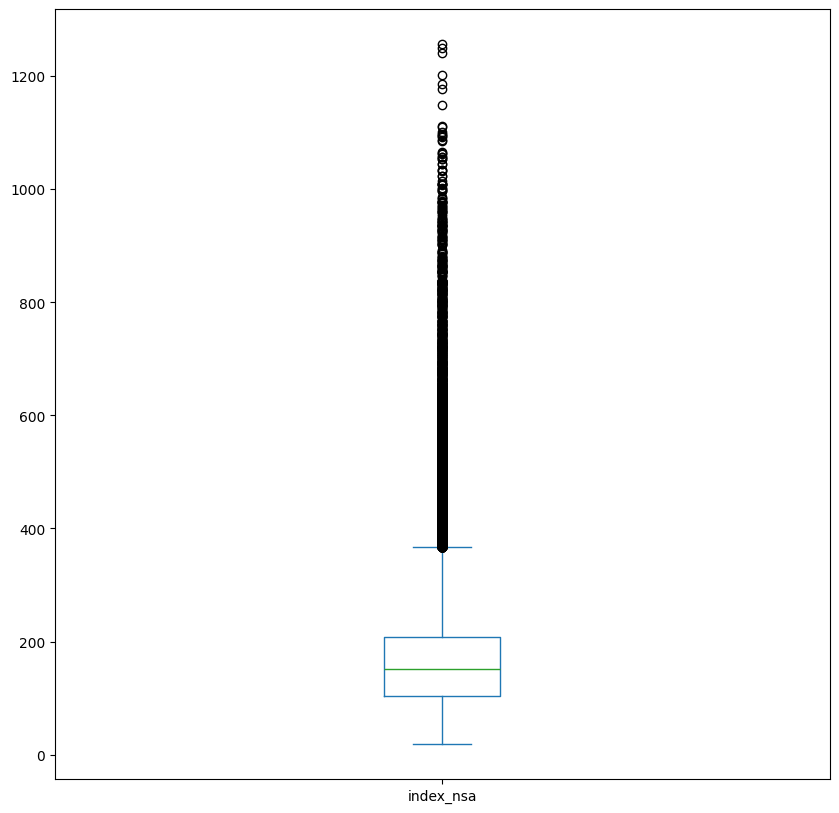

In [48]:
dados_enconded_clean['index_nsa'].plot(kind='box',figsize=(10,10))

In [49]:
q1 = dados_enconded_clean['index_nsa'].quantile(0.25)
q3 = dados_enconded_clean['index_nsa'].quantile(0.75)

iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

dados_enconded_clean_new = dados_enconded_clean[(dados_enconded_clean['index_nsa'] >= limite_inferior) & (dados_enconded_clean['index_nsa'] <= limite_superior)]

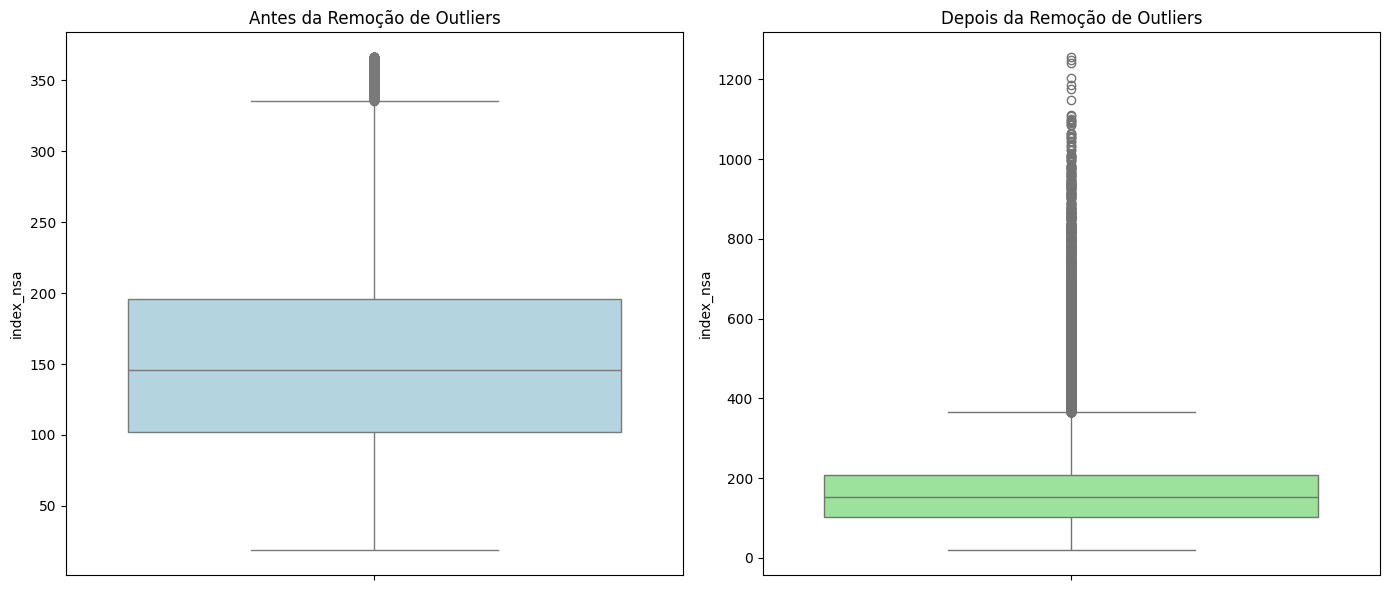

In [50]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=dados_enconded_clean_new['index_nsa'], color='lightblue')
plt.title('Antes da Remoção de Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(y=dados_enconded_clean['index_nsa'], color='lightgreen')
plt.title('Depois da Remoção de Outliers')

plt.tight_layout()
plt.show()

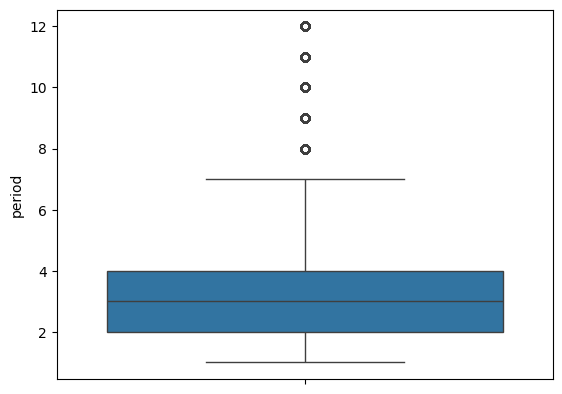

In [51]:
sns.boxplot(y='period', data=dados)
plt.show()

In [52]:
q1 = dados_enconded_clean_new['period'].quantile(0.25)
q3 = dados_enconded_clean_new['period'].quantile(0.75)

iqr = q3 - q1

limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

dados = dados_enconded_clean_new[(dados_enconded_clean_new['period'] >= limite_inferior) & (dados_enconded_clean_new['period'] <= limite_superior)]

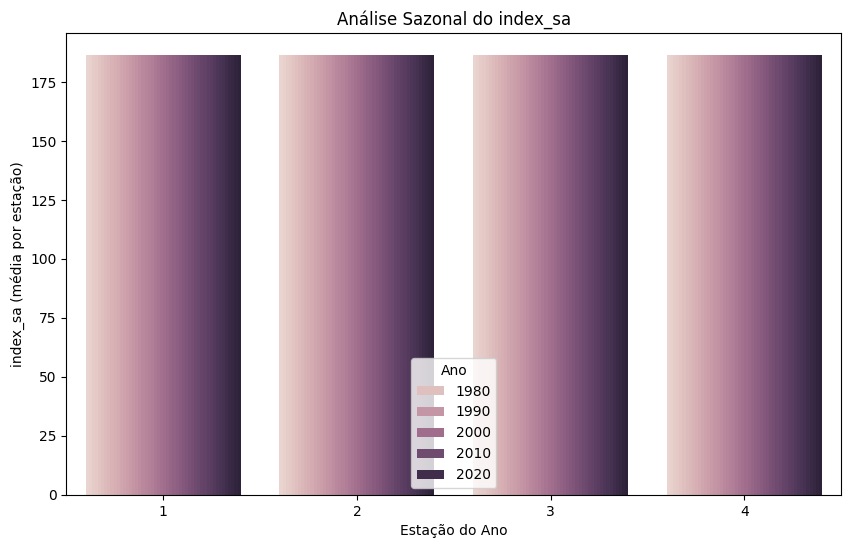

In [53]:
dados_seasonal_grouped = dados_enconded_clean_new.groupby(['period', 'yr'])['index_sa'].mean().reset_index()
plt.figure(figsize=(10,6))
sns.barplot(x='period', y='index_sa', hue='yr', data=dados_seasonal_grouped)
plt.title('Análise Sazonal do index_sa')
plt.ylabel('index_sa (média por estação)')
plt.xlabel('Estação do Ano')
plt.legend(title='Ano')
plt.show()

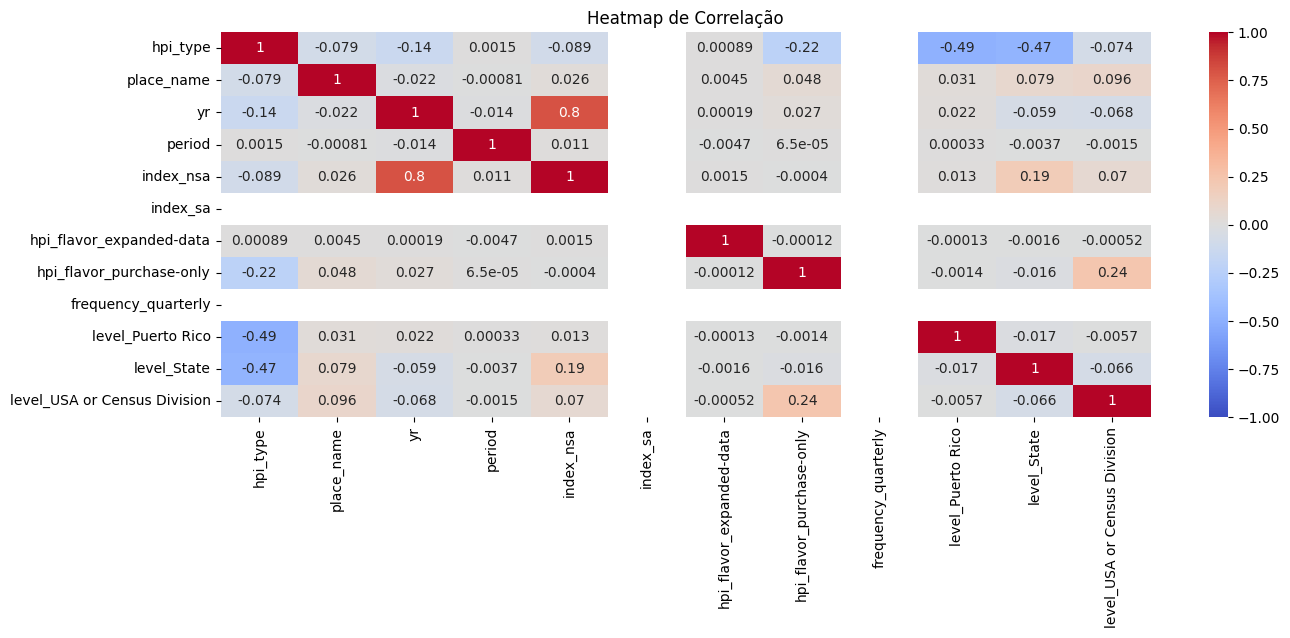

In [54]:
plt.figure(figsize=(15, 5))
sns.heatmap(dados.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title('Heatmap de Correlação')
plt.show()

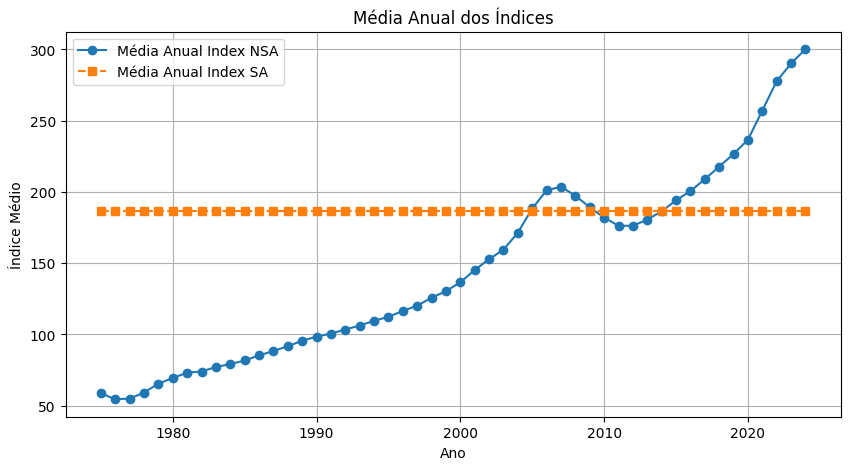

In [55]:
annual_mean = dados.groupby('yr')[['index_nsa', 'index_sa']].mean().reset_index()

plt.figure(figsize=(10,5))
plt.plot(annual_mean['yr'], annual_mean['index_nsa'], marker='o', linestyle='-', label='Média Anual Index NSA')
plt.plot(annual_mean['yr'], annual_mean['index_sa'], marker='s', linestyle='--', label='Média Anual Index SA')

plt.title('Média Anual dos Índices')
plt.xlabel('Ano')
plt.ylabel('Índice Médio')
plt.legend()
plt.grid(True)
plt.show()

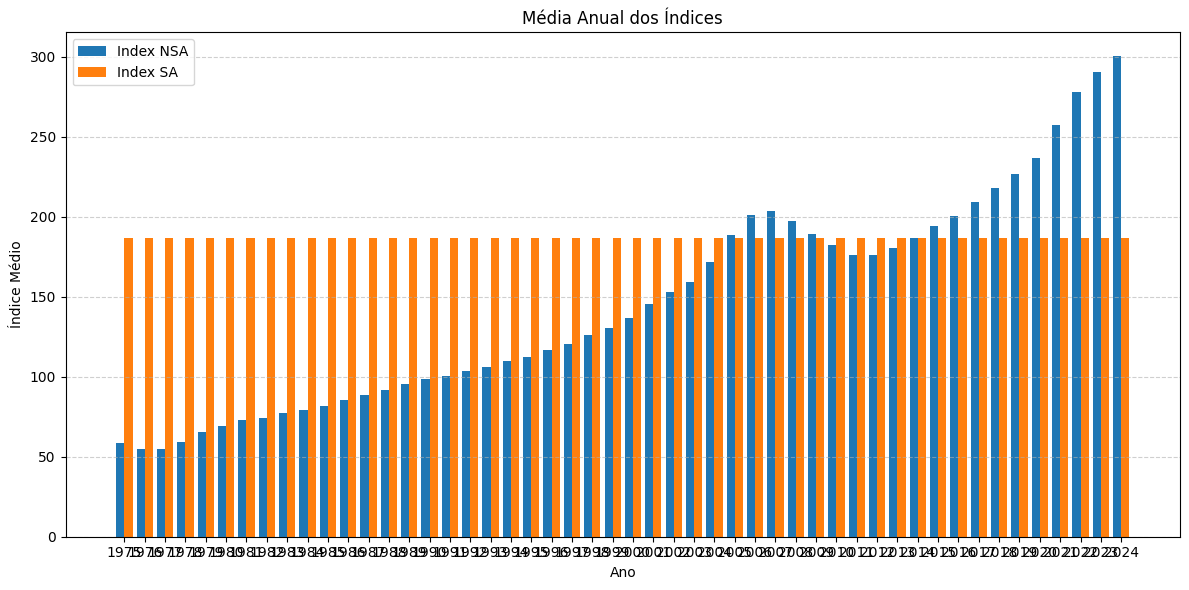

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

annual_mean = dados.groupby('yr')[['index_nsa', 'index_sa']].mean().reset_index()

bar_width = 0.4
x = annual_mean['yr']
x_indexes = range(len(x))

plt.figure(figsize=(12,6))

plt.bar([i - bar_width/2 for i in x_indexes], annual_mean['index_nsa'], width=bar_width, label='Index NSA')
plt.bar([i + bar_width/2 for i in x_indexes], annual_mean['index_sa'], width=bar_width, label='Index SA')

plt.title('Média Anual dos Índices')
plt.xlabel('Ano')
plt.ylabel('Índice Médio')
plt.xticks(ticks=x_indexes, labels=x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [57]:
print(dados.columns)

Index(['hpi_type', 'place_name', 'yr', 'period', 'index_nsa', 'index_sa',
       'hpi_flavor_expanded-data', 'hpi_flavor_purchase-only',
       'frequency_quarterly', 'level_Puerto Rico', 'level_State',
       'level_USA or Census Division'],
      dtype='object')


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           2       1.00      1.00      1.00        40
           3       0.98      0.98      0.98      1086
           4       1.00      1.00      1.00     15034

    accuracy                           1.00     16184
   macro avg       0.99      0.99      0.99     16184
weighted avg       1.00      1.00      1.00     16184



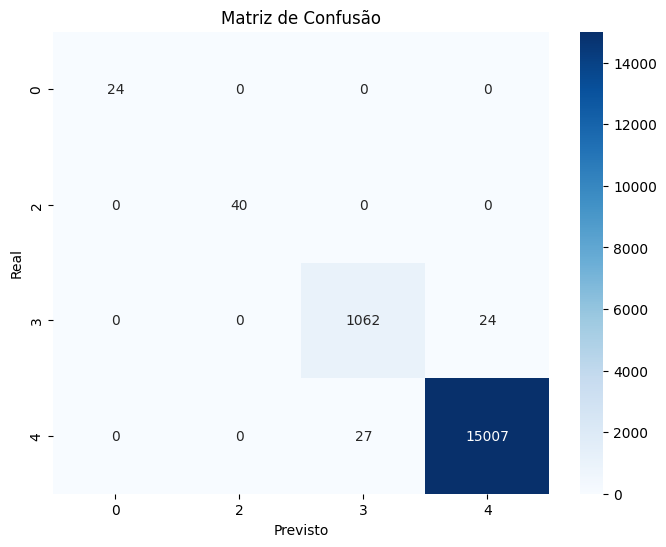

Tempo de execução: 3.96 segundos
Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


In [75]:
import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

start_time = time.time() 

X = dados[['place_name', 'yr', 'period', 'index_nsa', 'index_sa',
           'hpi_flavor_expanded-data', 'hpi_flavor_purchase-only',
           'frequency_quarterly', 'level_Puerto Rico', 'level_State',
           'level_USA or Census Division']]
y = dados['hpi_type'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))


all_labels = np.unique(y)  

cm = confusion_matrix(y_test, y_pred, labels=all_labels)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=all_labels, yticklabels=all_labels)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

end_time = time.time()  

print(f"Tempo de execução: {end_time - start_time:.2f} segundos")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')
recall   = recall_score(y_test, y_pred, average='weighted')
f1       = f1_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

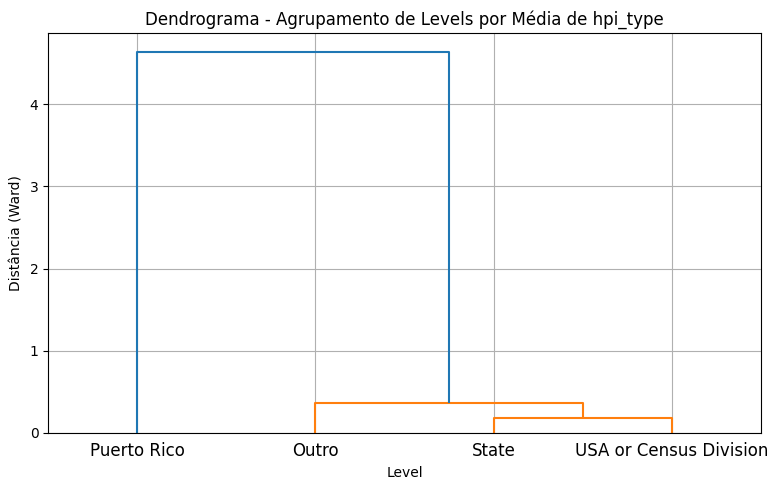

In [60]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder

def get_level(row):
    if row['level_Puerto Rico'] == 1:
        return 'Puerto Rico'
    elif row['level_State'] == 1:
        return 'State'
    elif row['level_USA or Census Division'] == 1:
        return 'USA or Census Division'
    else:
        return 'Outro'

dados['level'] = dados.apply(get_level, axis=1)


annual_pivot = dados.groupby('level')[['hpi_type']].mean()

linked = linkage(annual_pivot, method='ward')

plt.figure(figsize=(8, 5))
dendrogram(linked,
           labels=annual_pivot.index.values,
           distance_sort='ascending',
           show_leaf_counts=True)

plt.title('Dendrograma - Agrupamento de Levels por Média de hpi_type')
plt.xlabel('Level')
plt.ylabel('Distância (Ward)')
plt.grid(True)
plt.tight_layout()
plt.show()


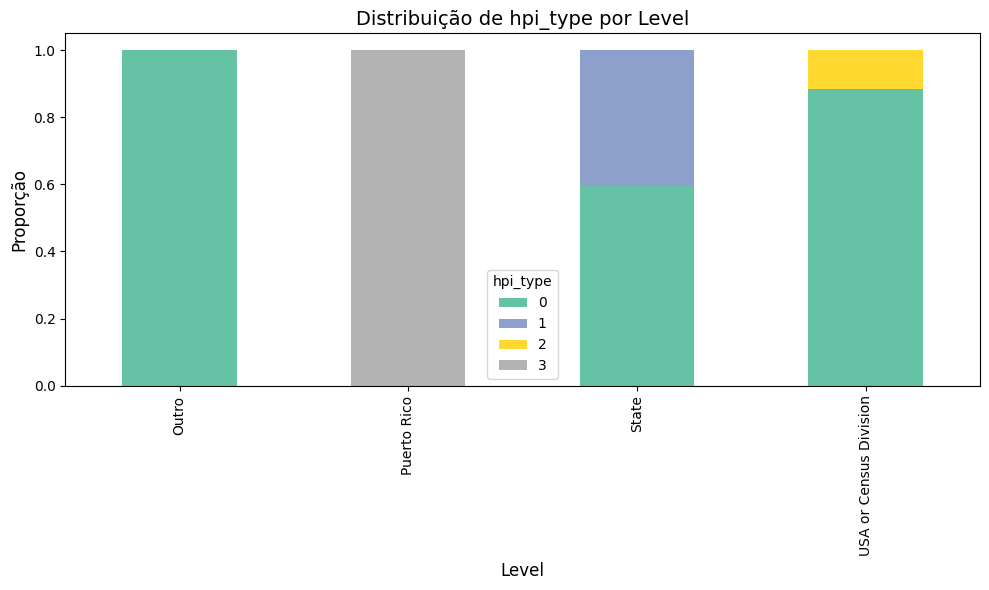

In [61]:
import matplotlib.pyplot as plt
import pandas as pd

def get_level(row):
    if row['level_Puerto Rico'] == 1:
        return 'Puerto Rico'
    elif row['level_State'] == 1:
        return 'State'
    elif row['level_USA or Census Division'] == 1:
        return 'USA or Census Division'
    else:
        return 'Outro'

dados['level'] = dados.apply(get_level, axis=1)

hpi_type_map = {tipo: idx for idx, tipo in enumerate(dados['hpi_type'].unique())}
dados['hpi_type_code'] = dados['hpi_type'].map(hpi_type_map)

crosstab = pd.crosstab(dados['level'], dados['hpi_type_code'], normalize='index')

ax = crosstab.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Set2')

plt.title('Distribuição de hpi_type por Level', fontsize=14)
plt.xlabel('Level', fontsize=12)
plt.ylabel('Proporção', fontsize=12)

legend_labels = [f'{v} = {k}' for k, v in hpi_type_map.items()]
plt.legend(title='hpi_type')

plt.tight_layout()
plt.show()

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      0.39      0.53        33
           2       0.76      0.76      0.76        33
           3       0.70      0.53      0.60      1085
           4       0.97      0.98      0.97     15033

    accuracy                           0.95     16184
   macro avg       0.81      0.67      0.72     16184
weighted avg       0.95      0.95      0.95     16184

Matriz de Confusão:
 [[   13     0     0    20]
 [    0    25     0     8]
 [    0     1   577   507]
 [    3     7   252 14771]]


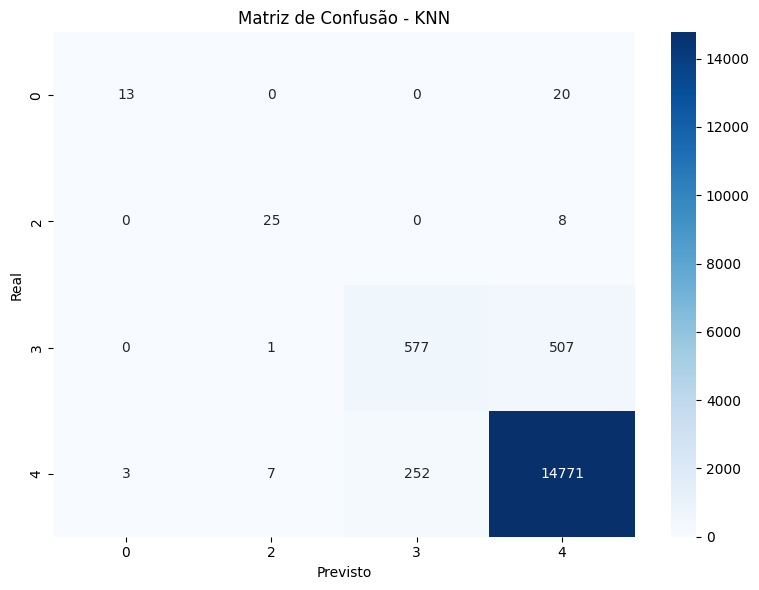

Tempo de execução: 1.66 segundos
Acurácia: 0.95
Precisão: 0.95
Recall: 0.95
F1-Score: 0.95


In [72]:
def pipeline_knn():
    le = LabelEncoder()
    dados['place_name_encoded'] = le.fit_transform(dados['place_name'])

    X = dados[['place_name_encoded', 'yr', 'period', 'index_nsa', 'index_sa',
               'hpi_flavor_expanded-data', 'hpi_flavor_purchase-only',
               'frequency_quarterly', 'level_Puerto Rico', 'level_State',
               'level_USA or Census Division']]
    y = dados['hpi_type'].values.ravel()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    knn = KNeighborsClassifier(n_neighbors=5) 
    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_test)

    print("Relatório de Classificação:\n", classification_report(y_test, y_pred))
    print("Matriz de Confusão:\n", confusion_matrix(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', 
                xticklabels=knn.classes_, yticklabels=knn.classes_)
    plt.xlabel('Previsto')
    plt.ylabel('Real')
    plt.title('Matriz de Confusão - KNN')
    plt.tight_layout()
    plt.show()

    return y_test, y_pred

import timeit

start = timeit.default_timer()
y_test, y_pred = pipeline_knn()
end = timeit.default_timer()

print(f"Tempo de execução: {end - start:.2f} segundos")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acuracia  = accuracy_score(y_test, y_pred)
precisao  = precision_score(y_test, y_pred, average='weighted')
recall    = recall_score(y_test, y_pred, average='weighted')
f1        = f1_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           2       1.00      0.94      0.97        33
           3       0.93      0.90      0.92      1085
           4       0.99      1.00      0.99     15033

    accuracy                           0.99     16184
   macro avg       0.98      0.96      0.97     16184
weighted avg       0.99      0.99      0.99     16184



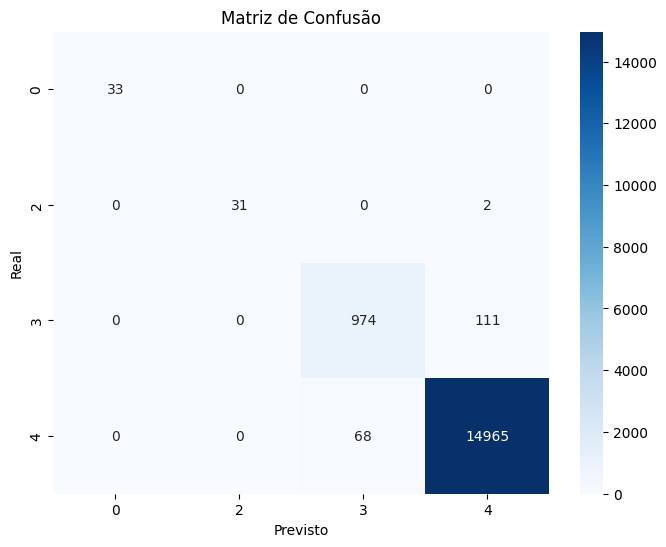

Tempo de execução: 36.60 segundos
Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


In [76]:
import timeit
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def treino_svc():
    X = dados[['place_name', 'yr', 'period', 'index_nsa', 'index_sa',
               'hpi_flavor_expanded-data', 'hpi_flavor_purchase-only',
               'frequency_quarterly', 'level_Puerto Rico', 'level_State',
               'level_USA or Census Division']]
    y = dados['hpi_type'].values.ravel()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    labels = model.classes_

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.title("Matriz de Confusão")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.show()

tempo_execucao = timeit.timeit("treino_svc()", globals=globals(), number=1)
print(f"Tempo de execução: {tempo_execucao:.2f} segundos")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')
recall   = recall_score(y_test, y_pred, average='weighted')
f1       = f1_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           2       0.54      1.00      0.70        33
           3       0.40      1.00      0.58      1085
           4       1.00      0.89      0.94     15033

    accuracy                           0.90     16184
   macro avg       0.74      0.97      0.81     16184
weighted avg       0.96      0.90      0.92     16184



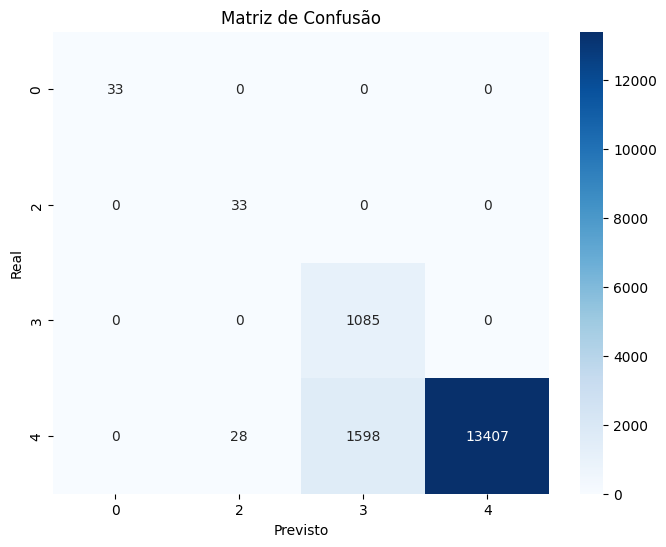

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           2       1.00      0.94      0.97        33
           3       0.93      0.90      0.92      1085
           4       0.99      1.00      0.99     15033

    accuracy                           0.99     16184
   macro avg       0.98      0.96      0.97     16184
weighted avg       0.99      0.99      0.99     16184



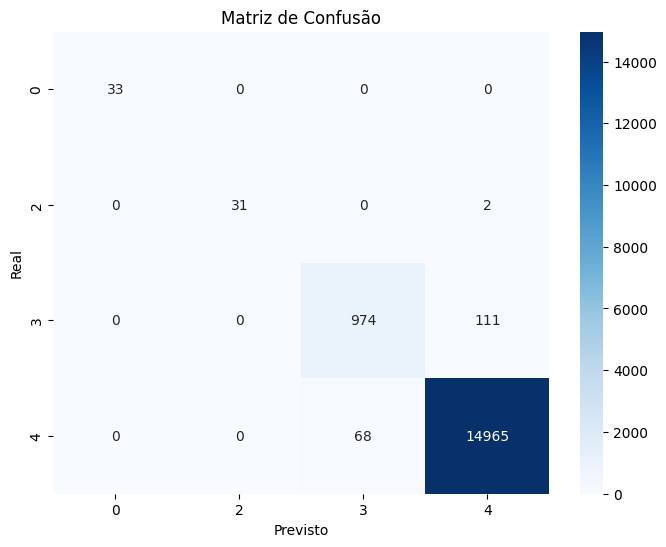

Tempo de execução: 36.13 segundos
Acurácia: 0.90
Precisão: 0.96
Recall: 0.90
F1-Score: 0.92


In [87]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import time

X = dados[['place_name', 'yr', 'period', 'index_nsa', 'index_sa',
           'hpi_flavor_expanded-data', 'hpi_flavor_purchase-only',
           'frequency_quarterly', 'level_Puerto Rico', 'level_State',
           'level_USA or Census Division']]
y = dados['hpi_type'].values.ravel()

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

start_train = time.time()
model = GaussianNB()
model.fit(X_train, y_train)
end_train = time.time()

start_pred = time.time()
y_pred = model.predict(X_test)
end_pred = time.time()

print("Classification Report:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
labels = model.classes_

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

tempo_execucao = timeit.timeit("treino_svc()", globals=globals(), number=1)
print(f"Tempo de execução: {tempo_execucao:.2f} segundos")

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')
recall   = recall_score(y_test, y_pred, average='weighted')
f1       = f1_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           2       1.00      1.00      1.00        33
           3       0.98      0.99      0.98      1085
           4       1.00      1.00      1.00     15033

    accuracy                           1.00     16184
   macro avg       0.99      1.00      1.00     16184
weighted avg       1.00      1.00      1.00     16184



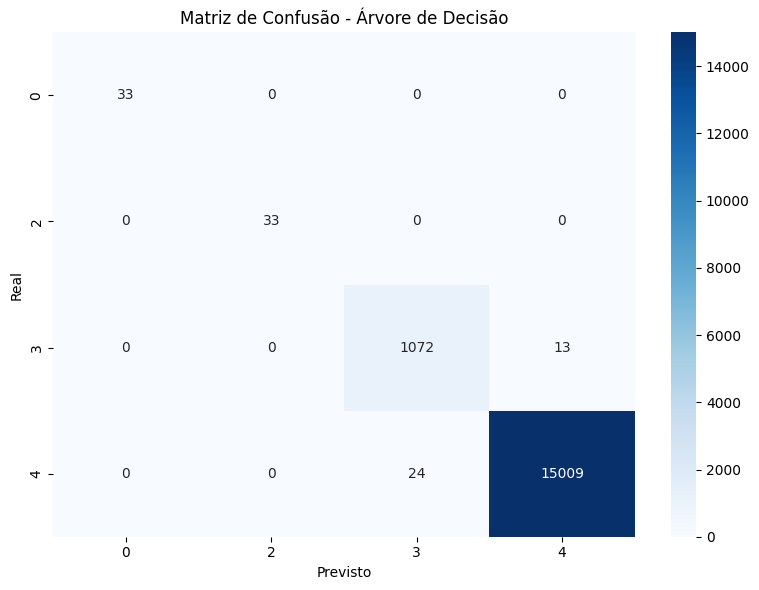

Tempo de execução: 0.55 segundos
Acurácia: 1.00
Precisão: 1.00
Recall: 1.00
F1-Score: 1.00


In [85]:
import timeit
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def treino_decision_tree():
    X = dados[['place_name', 'yr', 'period', 'index_nsa', 'index_sa',
               'hpi_flavor_expanded-data', 'hpi_flavor_purchase-only',
               'frequency_quarterly', 'level_Puerto Rico', 'level_State',
               'level_USA or Census Division']]
    y = dados['hpi_type'].values.ravel()

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42)

    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    cm = confusion_matrix(y_test, y_pred)
    labels = model.classes_

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=labels, yticklabels=labels)
    plt.title("Matriz de Confusão - Árvore de Decisão")
    plt.xlabel("Previsto")
    plt.ylabel("Real")
    plt.tight_layout()
    plt.show()

    return y_test, y_pred

start = timeit.default_timer()
y_test, y_pred = treino_decision_tree()
end = timeit.default_timer()

print(f"Tempo de execução: {end - start:.2f} segundos")

acuracia = accuracy_score(y_test, y_pred)
precisao = precision_score(y_test, y_pred, average='weighted')
recall   = recall_score(y_test, y_pred, average='weighted')
f1       = f1_score(y_test, y_pred, average='weighted')

print(f"Acurácia: {acuracia:.2f}")
print(f"Precisão: {precisao:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")


Mean Squared Error (MSE): 1159.91
R² Score: 0.77

Importância das Features (coeficientes):
level_Puerto Rico               2.909451e+02
level_USA or Census Division    8.589576e+01
level_State                     7.695130e+01
hpi_type                        7.378092e+01
hpi_flavor_expanded-data        3.719995e+01
hpi_flavor_purchase-only        1.885781e+01
yr                              4.932355e+00
period                          1.519748e+00
place_name                      8.640930e-03
frequency_quarterly            -1.421085e-14
index_sa                       -1.705303e-13
dtype: float64


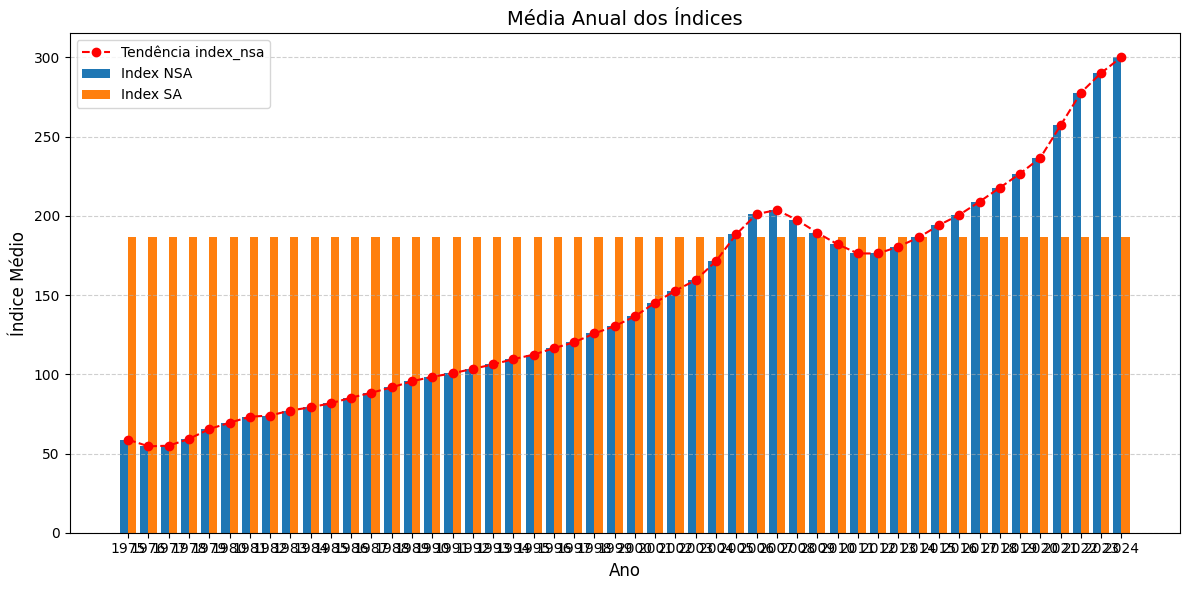

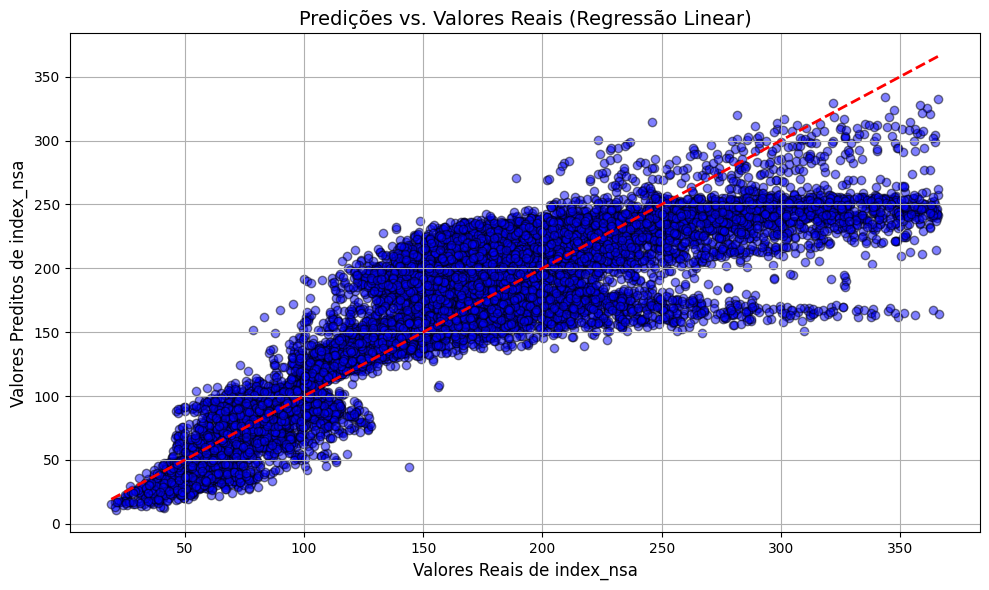

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = dados[['hpi_type', 'place_name', 'yr', 'period','index_sa',
       'hpi_flavor_expanded-data', 'hpi_flavor_purchase-only',
       'frequency_quarterly', 'level_Puerto Rico', 'level_State',
       'level_USA or Census Division']]
y = dados['index_nsa'].values.ravel()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'R² Score: {r2:.2f}')

feature_importance = pd.Series(model.coef_, index=X.columns).sort_values(ascending=False)
print("\nImportância das Features (coeficientes):")
print(feature_importance)

annual_mean = dados.groupby('yr')[['index_nsa', 'index_sa']].mean().reset_index()

bar_width = 0.4
x = annual_mean['yr']
x_indexes = range(len(x))

plt.figure(figsize=(12, 6))
plt.bar([i - bar_width/2 for i in x_indexes], annual_mean['index_nsa'], width=bar_width, label='Index NSA')
plt.bar([i + bar_width/2 for i in x_indexes], annual_mean['index_sa'], width=bar_width, label='Index SA')

plt.title('Média Anual dos Índices', fontsize=14)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Índice Médio', fontsize=12)
plt.xticks(ticks=x_indexes, labels=x)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()

plt.plot(x_indexes, annual_mean['index_nsa'], color='red', linestyle='--', marker='o', label='Tendência index_nsa')
plt.legend()

plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, c='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valores Reais de index_nsa', fontsize=12)
plt.ylabel('Valores Preditos de index_nsa', fontsize=12)
plt.title('Predições vs. Valores Reais (Regressão Linear)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()